# What is Time Series?
* Across industries, organizations commonly use time series data, which refers to any information collected over a regular interval of time in their operations. Examples include daily stock prices, energy consumption rates, social media engagement metrics, and retail demand among others. Analyzing time series data yields insights like trends, seasonal patterns and forecasts into future events that can help generate profits. For example, by understanding the seasonal trends in demand for retail products, companies can plan promotions to maximize sales throughout the year.
* There are multiple time series algorithms that are optimized for forecasting continuous values, such as temperature or product sales. A time series model can predict trends based only on the original dataset collected over a period of time.

**White noise**
* A time series is white noise if the variables are independent and identically distributed with a mean of zero. This means that all variables have the same variance (sigma^2) and each value has a zero correlation with all other values in the series.


**Data patterns**

**cycle**
* A cyclic pattern occurs when data rise and fall, but this does not happen within the fixed time and the duration of these fluctuations is usually at least 2 years
![](cycle.png)

**Trend**
* A trend pattern exists when there is a long-term increase or decrease in the series. The trend can be linear, exponential
![](trend.png)

**Seasonal**
* Seasonality exists when data is influenced by seasonal factors, such as a day of the week, a month, and one-quarter of the year. A seasonal pattern exists of a fixed known period.
![](sea.png)

**Random**
* which do not follow any trend, cycle or seasonal patterns
![](ran.png)


**Types**
* Types of time series models are moving average, ARIMA etc.The crucial thing is to choose the right forecasting method as per the characteristics of the time series data. The following are some of the basic time series models:



**MA(Moving Average)**
* A moving average is defined as an average of fixed number of items in the time series which move through the series by dropping the top items of the previous averaged group and adding the next in each successive average.
Yt depends only on random error terms
     	Yt = f( εt, εt-1, εt-2, εt-3, ..)
		or
 	Yt = β + εt + θ1 εt-1 + θ2εt-2 + θ3 εt-3 +…



**AR(Auto Regressive)**
* Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step. It is a very simple idea that can result in accurate forecasts on a range of time series problems.
* Yt depends only of past values. 
* Yt-1, Yt-2, Yt-3 etc
              * Yt  = f(Yt-1, Yt-2, Yt-3… )
              * Yt = β0 + β1Yt-1 + β2Yt-2 + β3Yt-3 …


**ARMA**
* Time series, autoregressive–moving-average (ARMA) models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression (AR) and the second for the moving average (MA).
* Combines AR and MA
	* Yt = β0 + β1Yt-1 + β2Yt-2 + β3Yt-3 …εt + θ1 εt-1 + θ2εt-2 + θ3 εt-3 +…


**ARIMA**
* Autoregressive Integrated Moving Average (ARIMA) model is another widely used forecasting technique that involves the combination of two or more time series models. This model is suitable for multivariate non-stationary data. ARIMA method is based on the concepts of autoregression, autocorrelation, and moving average.






### Create a Time Series Model to predict the future air passenger traffic

In [2]:
## Importing librries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
## loading the data
data=pd.read_csv('AirPassengers.csv')
# we have data of airline passengers travelled between January 1949 and December 1960

In [4]:
data.head(20)#first five rows

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [5]:
data.tail()#last 5 rows

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:

data.info()#info about datatype and null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
data=pd.read_csv('AirPassengers.csv',parse_dates=[0],index_col='Month')

In [8]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


# Basic checks

In [11]:
data.head()#first five rows


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
data.rename(columns = {'#Passengers': 'Passengers'}, inplace = True)

In [13]:
data['Passengers']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

In [14]:
data.describe()##used to view some basic statistical details like percentile, mean, std etc. 

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


# EDA

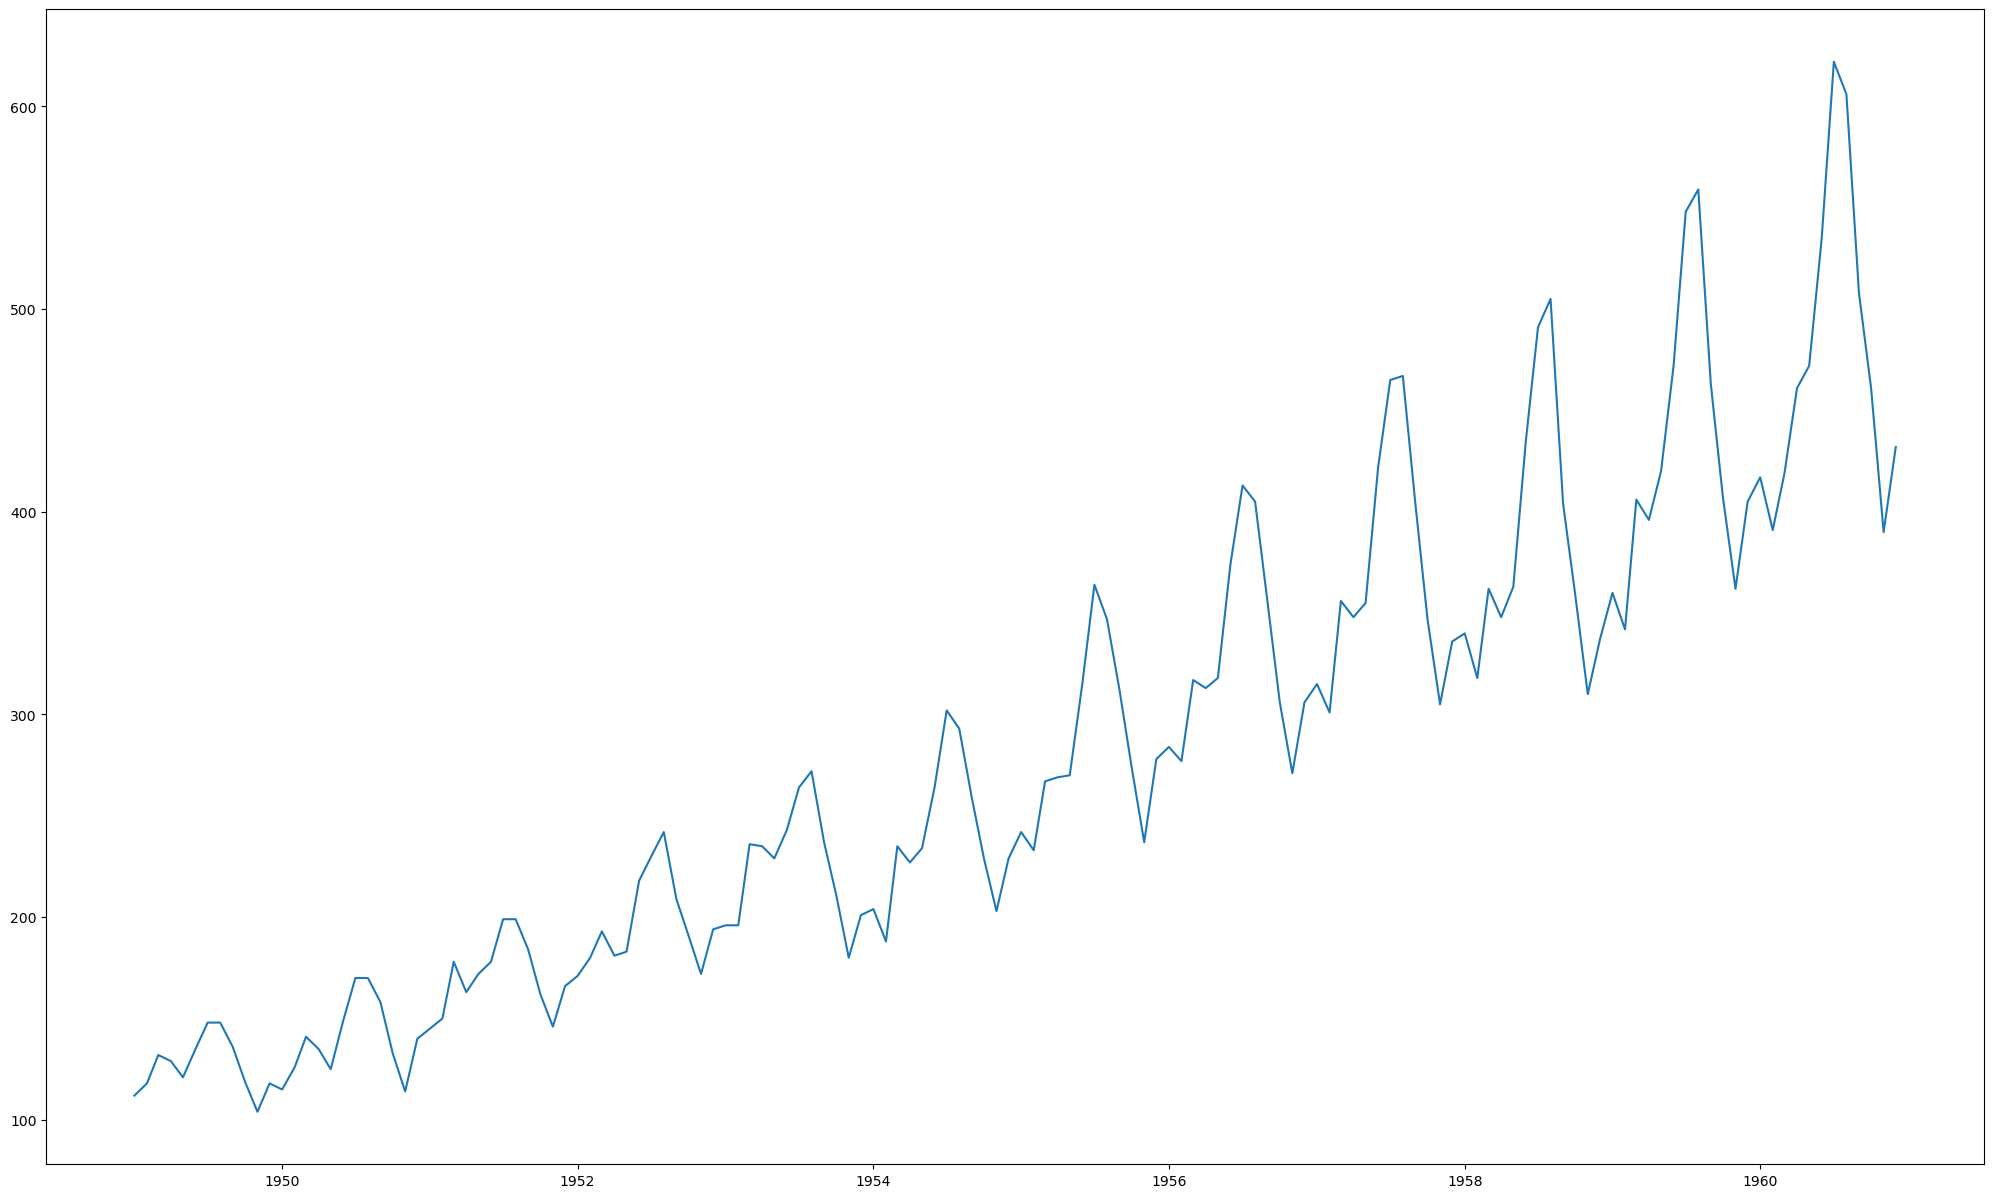

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15),facecolor='white')       #canvas  size
plt.plot(data)                                      #line plot 


## Stationarity

* Stationarity means that the statistical properties of a time series (or rather the process generating it) do not change over time.
* Stationarity is important because many useful analytical tools and statistical tests and models rely on it.

* Constant mean
* Constant variance
* Constant covariance between periods of identical distance

* All it states is that the covariance between time periods of identical lengths (let’s say 10 days/hours/minutes) should be identical to the covariance of some other period of the same length:

![image-2.png](attachment:image-2.png)



**Why do we need Stationarity?** 
- Stationary processes are easier to analyze
- Stationarity is assumed by most of the algorithms
- It is essential to remove any trend or seasonality before modeling the time series data because if the statistical properties do not change over time, it is easier to model the data accurately. One of the popular ways of making the series stationary is differencing.

**How to check if given series is stationary or not:**
- One way is to check autocorrelation.
- Autocorrelation is the similarity between observations as a function of the time lag between them.

* When plotting the value of the ACF for increasing lags (a plot called a correlogram), the values tend to degrade to zero quickly for stationary time series, while for non-stationary data the degradation will happen more slowly.

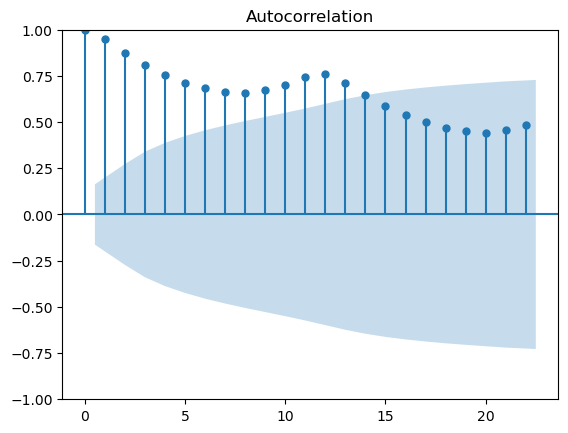

In [16]:
## Plotting the autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data);


In [17]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [18]:
# lets convert non-stationary data to stationary data >>> differencing

In [19]:
#apply differencing
data1=data.diff(periods=1)   

In [20]:
data1                  # Series integrated to the order of 1

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [21]:
data1=data1.iloc[1:] #null value discarded
data1

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


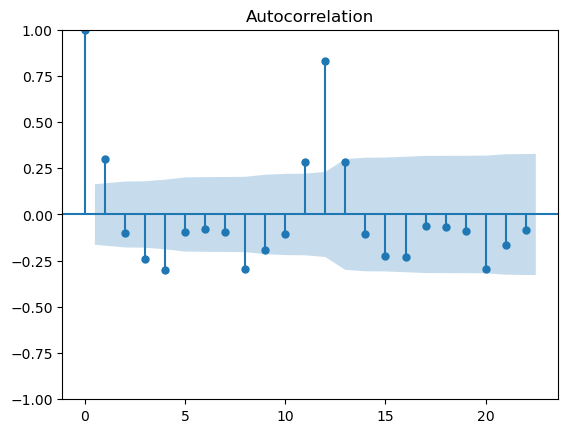

In [22]:
plot_acf(data1); # autocorrelation plot 

In [23]:
data2=data1.diff(periods=1) # differencing applied to data1

In [24]:
data2.head()

,Passengers
Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0


In [25]:
data2=data2.iloc[1:] # integrated to the order of 2

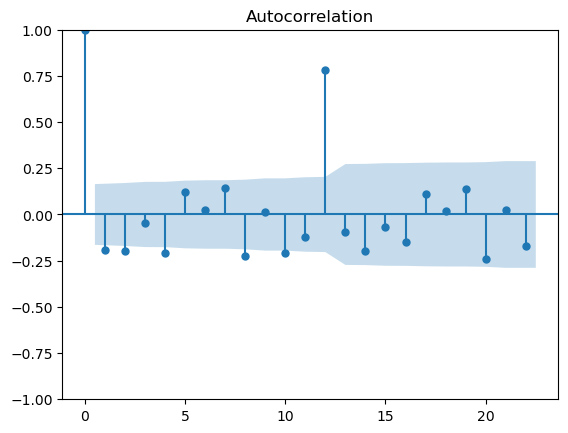

In [26]:
plot_acf(data2);

data -> data1 -> data2

In [27]:
data2.shape#shape of the data rows and columns

(142, 1)

In [28]:
## Creating training and test sets
train=data2[:100] 
test=data2[100:]

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1949-03-01 to 1957-06-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [30]:
# !pip install statsmodels

## Auto Regressive

In [31]:
train.tail(6)

,Passengers
Month,
1957-01-01,-26.0
1957-02-01,-23.0
1957-03-01,69.0
1957-04-01,-63.0
1957-05-01,15.0
1957-06-01,60.0


In [32]:
from statsmodels.tsa.ar_model import AutoReg


In [33]:
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(data2,maxlag=15,glob=True)
mod.ar_lags

# ar_select_order: selects the best number of lags
# maxlag: previous lags
# glob: try for all diff combinations

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [34]:
## model creation
ar_model=AutoReg(train,lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) 
ar_model_fit=ar_model.fit() 


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
##making prediction
prediction=ar_model_fit.predict(start=100,end=142)
prediction

1957-07-01   -26.325761
1957-08-01   -51.184110
1957-09-01   -43.959992
1957-10-01    -6.363909
1957-11-01    24.061033
1957-12-01    75.324375
1958-01-01   -30.525575
1958-02-01   -20.698153
1958-03-01    67.089284
1958-04-01   -56.564573
1958-05-01    13.377346
1958-06-01    66.337091
1958-07-01   -33.772981
1958-08-01   -58.228155
1958-09-01   -45.055018
1958-10-01   -14.690154
1958-11-01    35.370293
1958-12-01    80.696719
1959-01-01   -34.541873
1959-02-01   -19.600193
1959-03-01    67.142411
1959-04-01   -51.386197
1959-05-01    14.330762
1959-06-01    71.079740
1959-07-01   -41.567386
1959-08-01   -66.313619
1959-09-01   -47.008369
1959-10-01   -22.589679
1959-11-01    46.865050
1959-12-01    87.112502
1960-01-01   -38.965689
1960-02-01   -18.788673
1960-03-01    68.371352
1960-04-01   -46.488704
1960-05-01    17.168608
1960-06-01    74.840922
1960-07-01   -50.438749
1960-08-01   -75.197337
1960-09-01   -50.102526
1960-10-01   -29.954777
1960-11-01    58.602494
1960-12-01    94

In [36]:
import statsmodels
statsmodels.__version__

'0.13.5'

In [37]:
#pip install statsmodels==0.13.5

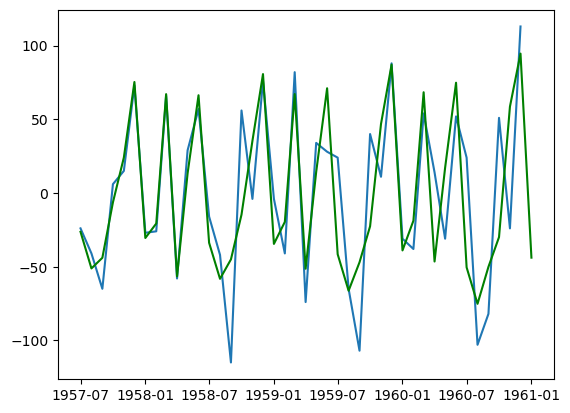

In [38]:
import matplotlib.pyplot as plt

plt.plot(test)
plt.plot(prediction,color='green') #graph of test vs prediction

## ARIMA Model

In [39]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

In [40]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,2,0))

model_arima_fit = model_arima.fit()#training

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Akaike Information Criteria (AIC): 

AIC is an estimator of prediction error which measures a statistical model in order to quantify the goodness of fit of the model. While comparing two models, the smaller the AIC value, the better the time series model.

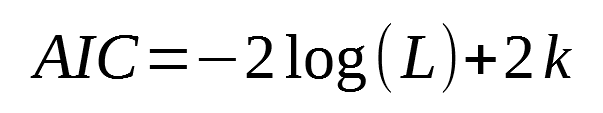
K: The number of model parameters.
ln(L): The log-likelihood of the model. This tells us how likely the model is, given the data.


AIC uses a model’s maximum likelihood estimation (log-likelihood) as a measure of fit. Log-likelihood is a measure of how likely one is to see their observed data, given a model. The model with the maximum likelihood is the one that “fits” the data the best. The natural log of the likelihood is used as a computational convenience.

AIC is low for models with high log-likelihoods. This means the model fits the data better, which is what we want. 

Once you’ve fit several regression models, you can compare the AIC value of each model. The model with the lowest AIC offers the best fit.

There is no value for AIC that can be considered “good” or “bad” because we simply use AIC as a way to compare regression models. The model with the lowest AIC offers the best fit. The absolute value of the AIC value is not important.

In [41]:
## evaluate the model
print(model_arima_fit.aic)

1098.8738469115458


In [42]:
## predicting the output of sample points
predictions = model_arima_fit.forecast(steps=30)

In [43]:
predictions

1957-07-01     125.303157
1957-08-01     178.114854
1957-09-01     238.611887
1957-10-01     294.380538
1957-11-01     353.058313
1957-12-01     409.946258
1958-01-01     467.935390
1958-02-01     525.247020
1958-03-01     582.975482
1958-04-01     640.447489
1958-05-01     698.077279
1958-06-01     755.609993
1958-07-01     813.202433
1958-08-01     870.758127
1958-09-01     928.336429
1958-10-01     985.900821
1958-11-01    1043.473771
1958-12-01    1101.041456
1959-01-01    1158.612381
1959-02-01    1216.181312
1959-03-01    1273.751469
1959-04-01    1331.320873
1959-05-01    1388.890740
1959-06-01    1446.460322
1959-07-01    1504.030079
1959-08-01    1561.599728
1959-09-01    1619.169444
1959-10-01    1676.739119
1959-11-01    1734.308819
1959-12-01    1791.878504
Freq: MS, Name: predicted_mean, dtype: float64

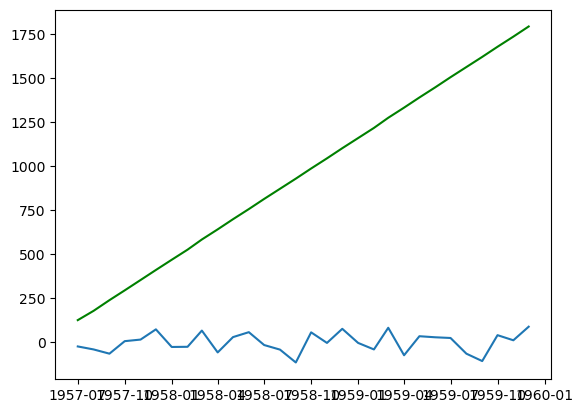

In [44]:
plt.plot(test[:30])
plt.plot(predictions,color='green')

## ARIMA will not work when data is seasonal in nature

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
## plotting the ARIMA forecast values using random pdq


In [47]:
p=0,1,2,3,4
d=0,1,2,3,4
q=0,1,2,3,4
#[(0,0,0),(0,1,2).... 125]

In [48]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)                  #values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q))
                                     # is used to find the cartesian product from the given iterator, output is lexicographic ordered.
print(len(pdq))
pdq                                 #number of combinaton of pdq


125


[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [49]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [50]:
##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]
for params in pdq: #iterating params over pdq
    try:
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 967.9135518309452
(0, 0, 1) 931.437281104524
(0, 0, 2) 925.7296663864893
(0, 0, 3) 920.9009365266666
(0, 0, 4) 912.6569512615787
(0, 1, 0) 1046.7319001420174
(0, 1, 1) 963.8739387623483
(0, 1, 2) 933.2130365323442
(0, 1, 3) 926.5735460079998
(0, 1, 4) 924.311365955854
(0, 2, 0) 1143.9983209811053
(0, 2, 1) 1043.7570583844451
(0, 2, 2) 966.1633952995417
(0, 2, 3) 941.6116039858562
(0, 2, 4) 933.756401250724
(0, 3, 0) 1247.2070979580242
(0, 3, 1) 1139.8659459337032
(0, 3, 2) 1044.6471605054996
(0, 3, 3) 972.366041514582
(0, 3, 4) 955.3691169611801
(0, 4, 0) 1351.0676098839504
(0, 4, 1) 1241.6050826097264
(0, 4, 2) 1139.2023602413446
(0, 4, 3) 1048.6628819450657
(0, 4, 4) 987.1564143046871
(1, 0, 0) 963.0127961447531
(1, 0, 1) 928.7077562630661
(1, 0, 2) 919.8685371067342
(1, 0, 3) 921.8388138771824
(1, 0, 4) 923.3886062554853
(1, 1, 0) 1021.0396389673776
(1, 1, 1) 959.4979676508102
(1, 1, 2) 962.9514176508055
(1, 1, 3) 923.2264337249069
(1, 1, 4) 923.1013932274815
(1, 2, 0) 109

In [51]:
list2

[967.9135518309452,
 931.437281104524,
 925.7296663864893,
 920.9009365266666,
 912.6569512615787,
 1046.7319001420174,
 963.8739387623483,
 933.2130365323442,
 926.5735460079998,
 924.311365955854,
 1143.9983209811053,
 1043.7570583844451,
 966.1633952995417,
 941.6116039858562,
 933.756401250724,
 1247.2070979580242,
 1139.8659459337032,
 1044.6471605054996,
 972.366041514582,
 955.3691169611801,
 1351.0676098839504,
 1241.6050826097264,
 1139.2023602413446,
 1048.6628819450657,
 987.1564143046871,
 963.0127961447531,
 928.7077562630661,
 919.8685371067342,
 921.8388138771824,
 923.3886062554853,
 1021.0396389673776,
 959.4979676508102,
 962.9514176508055,
 923.2264337249069,
 923.1013932274815,
 1098.8738469115458,
 1019.1218015515585,
 962.4933475048567,
 965.1462570566152,
 931.2406870698956,
 1186.5053670162433,
 1096.1395155121863,
 1021.3161952164578,
 1048.4332308648043,
 971.2000898804467,
 1279.6340971680033,
 1182.4415145945297,
 1096.907662368741,
 1141.7606661351151,
 105

In [52]:
min(list2)  # lowest aic score

904.9117972136689

In [53]:
# pdq corresponding to lowest aic
loc=list2.index(min(list2))
print(loc)
list1[loc]

103


(4, 0, 3)

In [54]:
train.tail()

,Passengers
Month,
1957-02-01,-23.0
1957-03-01,69.0
1957-04-01,-63.0
1957-05-01,15.0
1957-06-01,60.0


In [58]:
## create the final model with lowest aic score parameter
model_arima = ARIMA(train, order=(4, 0, 3))

model_arima_fit = model_arima.fit() #training

In [59]:
print(model_arima_fit.aic) # confirm aic score

904.9117972136689


In [60]:
forecast = model_arima_fit.forecast(steps=9)
forecast 

1957-07-01   -51.877937
1957-08-01   -22.750884
1957-09-01    22.964179
1957-10-01   -22.793630
1957-11-01     5.529112
1957-12-01    28.124647
1958-01-01   -28.701403
1958-02-01    -0.724893
1958-03-01    26.553457
Freq: MS, Name: predicted_mean, dtype: float64

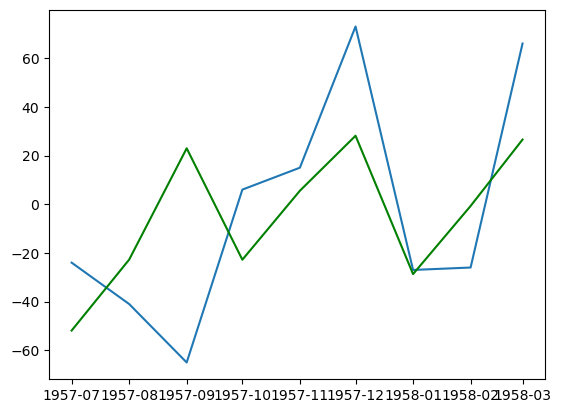

In [61]:
# Comparision of actual vs predicted for 9 values
plt.plot(test[:9])
plt.plot(forecast,color='green')#line plot for prediction

In [84]:
actual=test[0:9]
actual=actual['Passengers']
actual

Month
1957-07-01   -24.0
1957-08-01   -41.0
1957-09-01   -65.0
1957-10-01     6.0
1957-11-01    15.0
1957-12-01    73.0
1958-01-01   -27.0
1958-02-01   -26.0
1958-03-01    66.0
Name: Passengers, dtype: float64

In [79]:
forecast

1957-07-01   -51.877937
1957-08-01   -22.750884
1957-09-01    22.964179
1957-10-01   -22.793630
1957-11-01     5.529112
1957-12-01    28.124647
1958-01-01   -28.701403
1958-02-01    -0.724893
1958-03-01    26.553457
Freq: MS, Name: predicted_mean, dtype: float64

In [86]:
# Accuracy metrics
import numpy as np
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    
 
    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast, actual)

{'mse': 1553.1366673282253,
 'mae': 31.517128383203588,
 'rmse': 39.40985495188006}

In [87]:
forecast25 = model_arima_fit.forecast(steps=25)
test1 = test[0:25].values.flatten()

test1

array([ -24.,  -41.,  -65.,    6.,   15.,   73.,  -27.,  -26.,   66.,
        -58.,   29.,   57.,  -16.,  -42., -115.,   56.,   -4.,   76.,
         -4.,  -41.,   82.,  -74.,   34.,   28.,   24.])

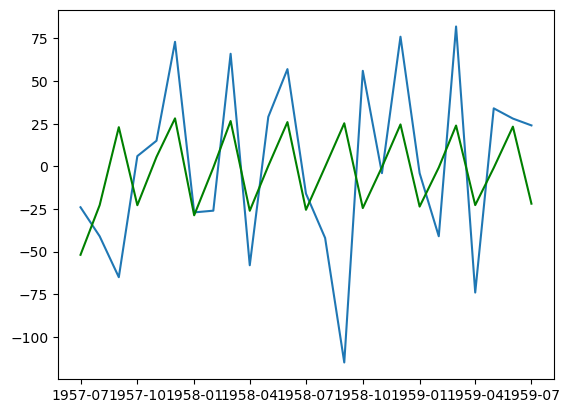

In [88]:
# Comparision of actual vs predicted for 25 values
plt.plot(test[:25])
plt.plot(forecast25,color='green') #line plot for prediction

In [91]:
forecast25.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 25 entries, 1957-07-01 to 1959-07-01
Freq: MS
Series name: predicted_mean
Non-Null Count  Dtype  
--------------  -----  
25 non-null     float64
dtypes: float64(1)
memory usage: 400.0 bytes


In [120]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
print(rmse(test[:25]['Passengers'], forecast25))
  
# Calculate mean squared error
print(mean_squared_error(test[:25], forecast25))


48.49088784681074
2351.366204171978


In [111]:
list(test[:25]['Passengers'])

[-24.0,
 -41.0,
 -65.0,
 6.0,
 15.0,
 73.0,
 -27.0,
 -26.0,
 66.0,
 -58.0,
 29.0,
 57.0,
 -16.0,
 -42.0,
 -115.0,
 56.0,
 -4.0,
 76.0,
 -4.0,
 -41.0,
 82.0,
 -74.0,
 34.0,
 28.0,
 24.0]

In [98]:
list(forecast25.values)

[-51.8779366621312,
 -22.750883711109964,
 22.9641786610536,
 -22.793629825386027,
 5.529112132333214,
 28.124647072353902,
 -28.701403380106107,
 -0.724892846206446,
 26.553457317841122,
 -26.049335005573578,
 0.2383349785977716,
 25.936844985708593,
 -25.482227940913813,
 -0.26019331648450733,
 25.2467069579496,
 -24.468872049061748,
 -0.44437994041795487,
 24.567918339484773,
 -23.596092717717415,
 -0.6728371922460569,
 23.911013350179932,
 -22.728927668129618,
 -0.875496068983825,
 23.267229451720606,
 -21.89644758983481]

## 10 min break